In [1]:

from scipy.stats import kstest,ttest_ind
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
additive_test_files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/additive_test/british_male/train_cohort_pred.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/additive_test/british_female/train_cohort_pred.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/additive_test/pre_menopause/train_cohort_pred.csv",
    "/data6/deepro/ukb_bmi/3_characterization/data/additive_test/post_menopause/train_cohort_pred.csv",
    ]

In [4]:
groups = ["british_male", "british_female", "pre_menopause", "post_menopause"]

In [5]:
def get_nonadditive_table(nonadditive_file, group):
    nonadd_df = pd.read_csv(nonadditive_file)
    nonadd_df["group"] = group
    return nonadd_df

def get_nonadd_status(add_test_files, groups):
    nonadd_dfs = [get_nonadditive_table(nadd_file, group) for nadd_file,group in zip(add_test_files, groups)]
    return pd.concat(nonadd_dfs)


In [6]:
nadd_table = get_nonadd_status(additive_test_files, groups).melt(id_vars=["group"], value_vars=["bmi", "bmi_pred"], var_name="bmi_type", value_name="BMI")

In [7]:
nadd_table

,group,bmi_type,BMI
0,british_male,bmi,40.856700
1,british_male,bmi,42.260400
2,british_male,bmi,27.044400
3,british_male,bmi,27.555100
4,british_male,bmi,30.151400
...,...,...,...
49715,post_menopause,bmi_pred,25.704558
49716,post_menopause,bmi_pred,25.745670
49717,post_menopause,bmi_pred,26.090316
49718,post_menopause,bmi_pred,26.326275


/tmp/ipykernel_11572/3095139815.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Male", "Female", "Pre\nmenopause", "Post\nmenopause"], rotation=0, fontsize=18)
/tmp/ipykernel_11572/3095139815.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


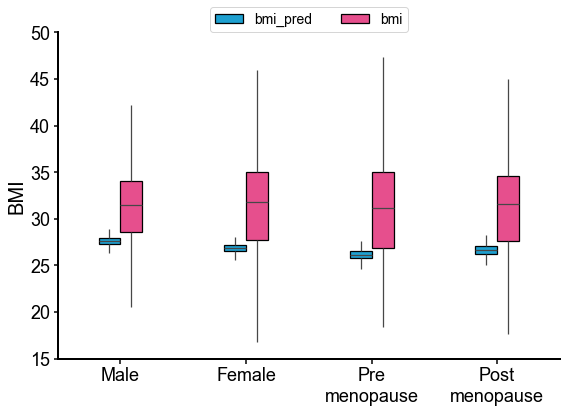

In [8]:
boxdf = nadd_table

fig,ax = plt.subplots(figsize=(9, 6))

# Box Plot
sns_ax = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#FF3688"],  # "#eecc16", "#008176" '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="group",
    y="BMI",
    hue="bmi_type",
    hue_order=["bmi_pred", "bmi"],
    color="k",
    orient="v",
    legend=True,
    width=0.35, linewidth=1.25, fliersize=0, capprops={'color':'none'}, boxprops={'edgecolor':'k'} #'facecolor':'none', 
    )

# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((15, 50))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Male", "Female", "Pre\nmenopause", "Post\nmenopause"], rotation=0, fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_xlabel("")
ax.set_ylabel("BMI", fontsize=20)

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.1), fontsize=14)

In [9]:
for g in groups:
    print(f"Running t-test for {g}")
    expected_g = nadd_table.loc[(nadd_table.bmi_type=="bmi_pred")&(nadd_table.group==g)]
    observed_g = nadd_table.loc[(nadd_table.bmi_type=="bmi")&(nadd_table.group==g)]
    ttest_res = ttest_ind(expected_g.BMI, observed_g.BMI, alternative="less")
    print(f"TTest results:\tStatistics={ttest_res[0]};p-val={ttest_res[1]}")

Running t-test for british_male
TTest results:	Statistics=-80.62173983901175;p-val=0.0
Running t-test for british_female
TTest results:	Statistics=-66.259788617967;p-val=0.0
Running t-test for pre_menopause
TTest results:	Statistics=-36.56861087303107;p-val=3.894953085506781e-249
Running t-test for post_menopause
TTest results:	Statistics=-79.22483628594067;p-val=0.0


In [10]:
ttest_ind(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi, alternative="less"), kstest(single_hit_pheno_c2.bmi, combo_hit_pheno_c2.bmi)

NameError: name 'single_hit_pheno_c2' is not defined

In [ ]:
ttest_ind(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi, alternative="less"), kstest(single_hit_pheno_c3.bmi, combo_hit_pheno_c3.bmi)

(Ttest_indResult(statistic=-26.510898062286397, pvalue=8.810889200687164e-155),
 KstestResult(statistic=0.4330296110581548, pvalue=2.5767301611682205e-149))